## **Objective : To collect data from the data source and process all images to make them suitable for training.**

The dataset consist of 23479 different face images with their respective age and gender [male(0) and female(1)] values. Dataset link : https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [21]:
dataset_path = r"/content/drive/MyDrive/age_gender.csv"

# loading the dataset from drive
df = pd.read_csv(dataset_path)
df.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


## **Exploratory Data Analysis (EDA)**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


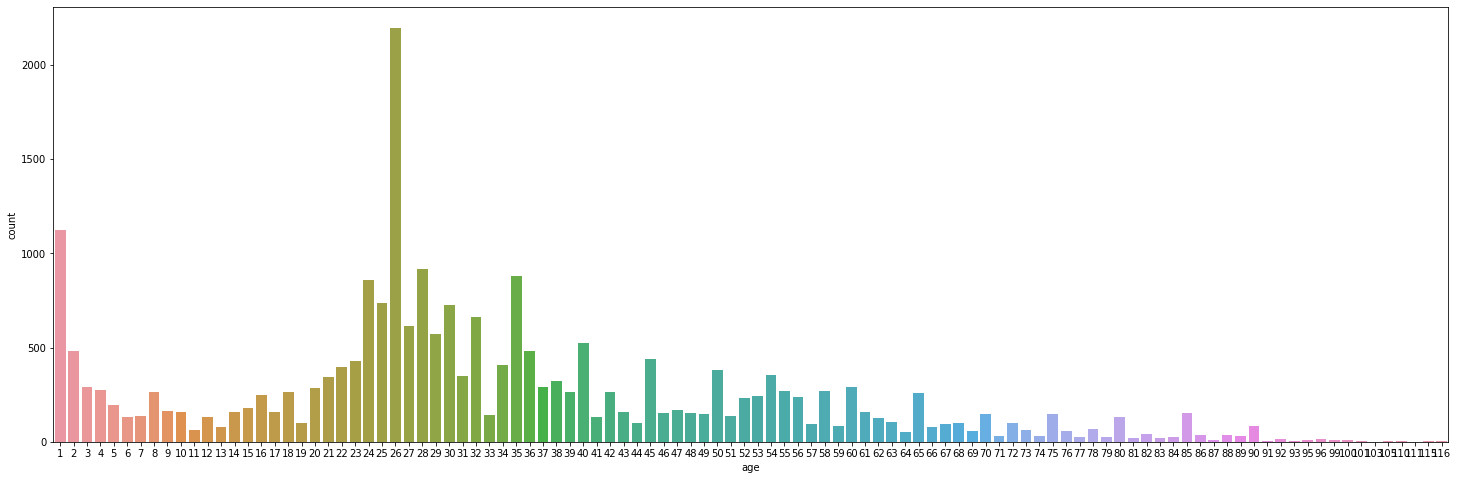

In [23]:
# Lets find how many images do we have for each age group

plt.figure(figsize=(25,8))
sns.countplot(x='age', data=df) #age distribution

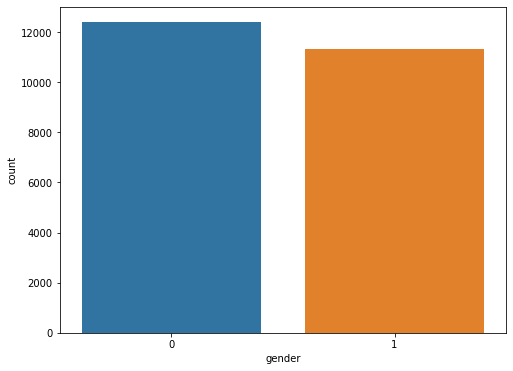

In [24]:
# Lets find how many images do we have for each gender group

plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=df) #gender distribution

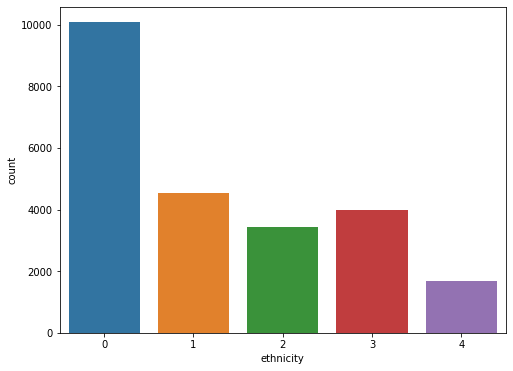

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='ethnicity', data=df) #ethnicity distribution

## **Processing the data**

Currently all images are in 1D format in "pixels" column,we'll have to reshape them to 3D format so that we can train models.


In [26]:
# Highest age in our dataset
print("Highest age in our dataset : ",max(df["age"].unique()))


Highest age in our dataset :  116


#### **Currently our dataset consists of face images of people between age of (1-116).We'll remove all images with age above 60,so that our dataset size reduces and it also makes it easy for model training.**

In [27]:
# Removing all rows with age>60
df = df[df["age"] <= 60]
df.reset_index(inplace=True,drop=True)

# Highest age in our dataset
print("Highest age in our dataset : ",max(df["age"].unique()))

print("Total samples : ",len(df))

Highest age in our dataset :  60
Total samples :  21310


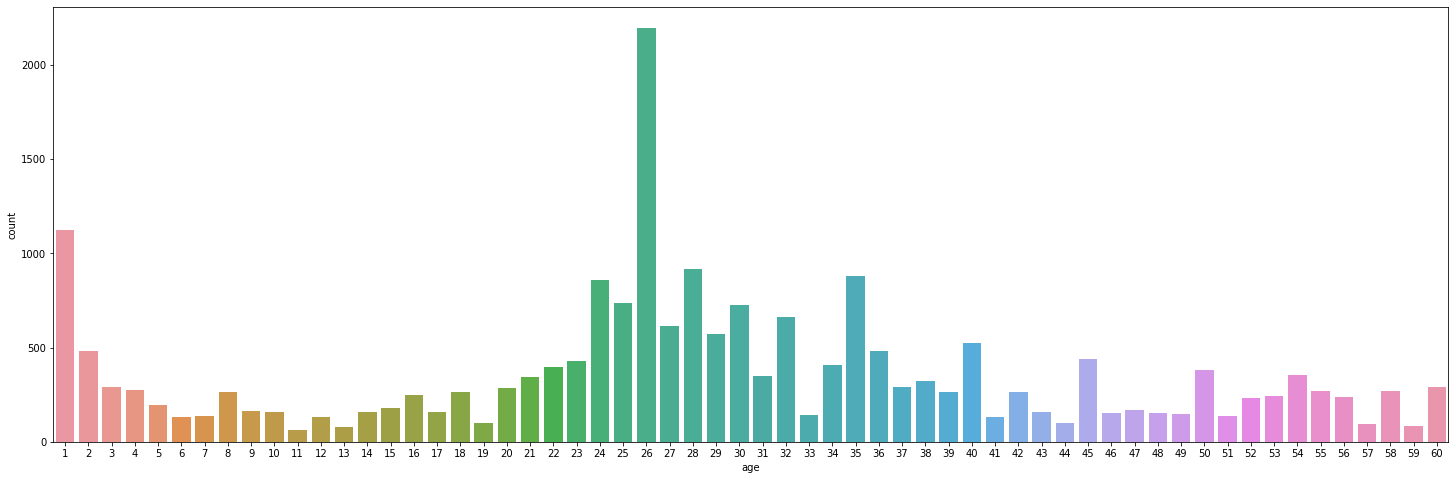

In [28]:
# Lets find how many images do we have for each age group

plt.figure(figsize=(25,8))
sns.countplot(x='age', data=df) #age distribution

In [29]:
from tqdm import tqdm

# converting data to numpy array
x = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))

X_t = []
for i in tqdm(range(x.shape[0])):
    # reshaping the data to (n,48,48,1)
    X_t.append(x[i].reshape(48, 48, 1))

100%|██████████| 21310/21310 [00:00<00:00, 194045.00it/s]


In [30]:
#normalization
X_t=np.array(X_t)/255.0

print(X_t[0])

[[[0.5058824 ]
  [0.5019608 ]
  [0.5019608 ]
  ...
  [0.4627451 ]
  [0.3882353 ]
  [0.20784314]]

 [[0.50980395]
  [0.5058824 ]
  [0.5019608 ]
  ...
  [0.45882353]
  [0.38431373]
  [0.20392157]]

 [[0.5137255 ]
  [0.5058824 ]
  [0.50980395]
  ...
  [0.44705883]
  [0.38039216]
  [0.19607843]]

 ...

 [[0.4745098 ]
  [0.5411765 ]
  [0.5764706 ]
  ...
  [0.5921569 ]
  [0.5882353 ]
  [0.5803922 ]]

 [[0.45882353]
  [0.5372549 ]
  [0.57254905]
  ...
  [0.58431375]
  [0.5803922 ]
  [0.5803922 ]]

 [[0.4509804 ]
  [0.5294118 ]
  [0.5568628 ]
  ...
  [0.57254905]
  [0.57254905]
  [0.57254905]]]


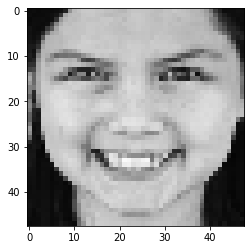

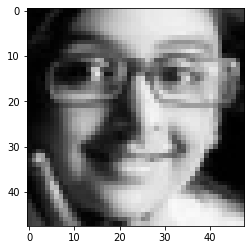

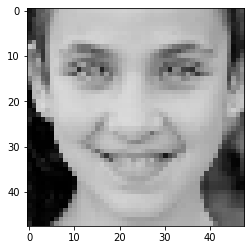

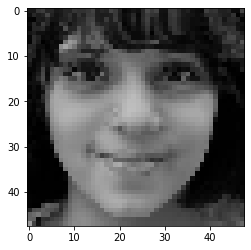

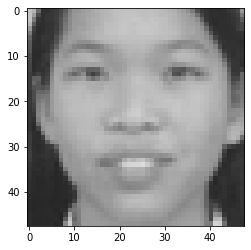

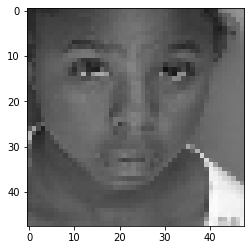

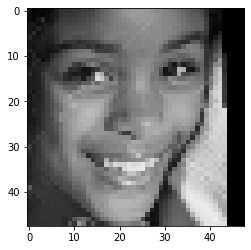

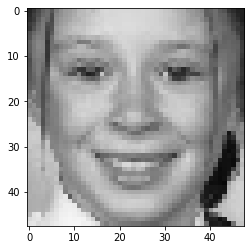

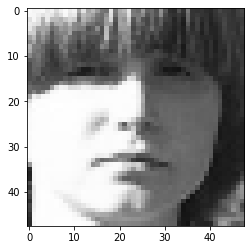

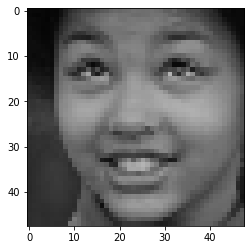

In [31]:
# plotting images 

for i in range(10):
  plt.imshow(cv2.cvtColor(X_t[i+1500], cv2.COLOR_BGR2RGB))
  plt.show()


In [32]:
# seperating x and y 
x = X_t
y = df[["age","gender"]]

In [33]:
x.shape

(21310, 48, 48, 1)

In [34]:
y.shape

(21310, 2)

In [35]:
y.head(100)

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
95,1,0
96,1,0
97,1,0
98,1,0


age       1
gender    0
Name: 0, dtype: int64


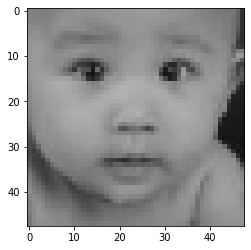

age       1
gender    1
Name: 800, dtype: int64


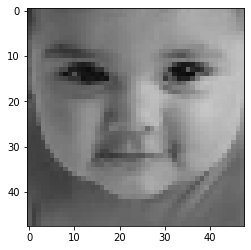

age       14
gender     1
Name: 1600, dtype: int64


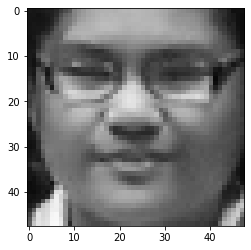

age       18
gender     1
Name: 2400, dtype: int64


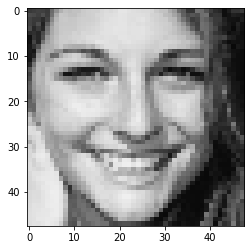

age       20
gender     1
Name: 3200, dtype: int64


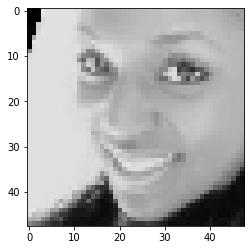

age       22
gender     0
Name: 4000, dtype: int64


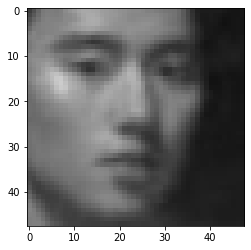

age       24
gender     0
Name: 4800, dtype: int64


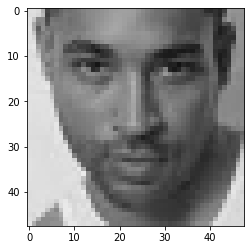

age       25
gender     0
Name: 5600, dtype: int64


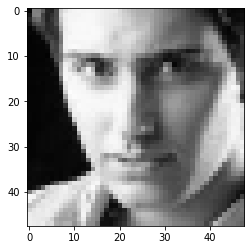

age       26
gender     1
Name: 6400, dtype: int64


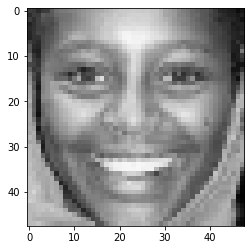

age       26
gender     0
Name: 7200, dtype: int64


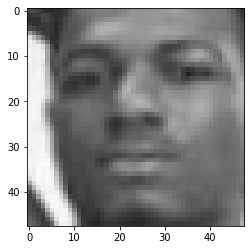

In [36]:
# print images with their ground truth
for i in range(10):
  plt.imshow(cv2.cvtColor(x[i*800], cv2.COLOR_BGR2RGB))
  print(y.iloc[i*800])
  plt.show()

In [37]:
# saving images as numpy file for next notebook
np.save("x.npy",x)

In [38]:
# saving y as numpy file for next notebook
np.save("y.npy",y)

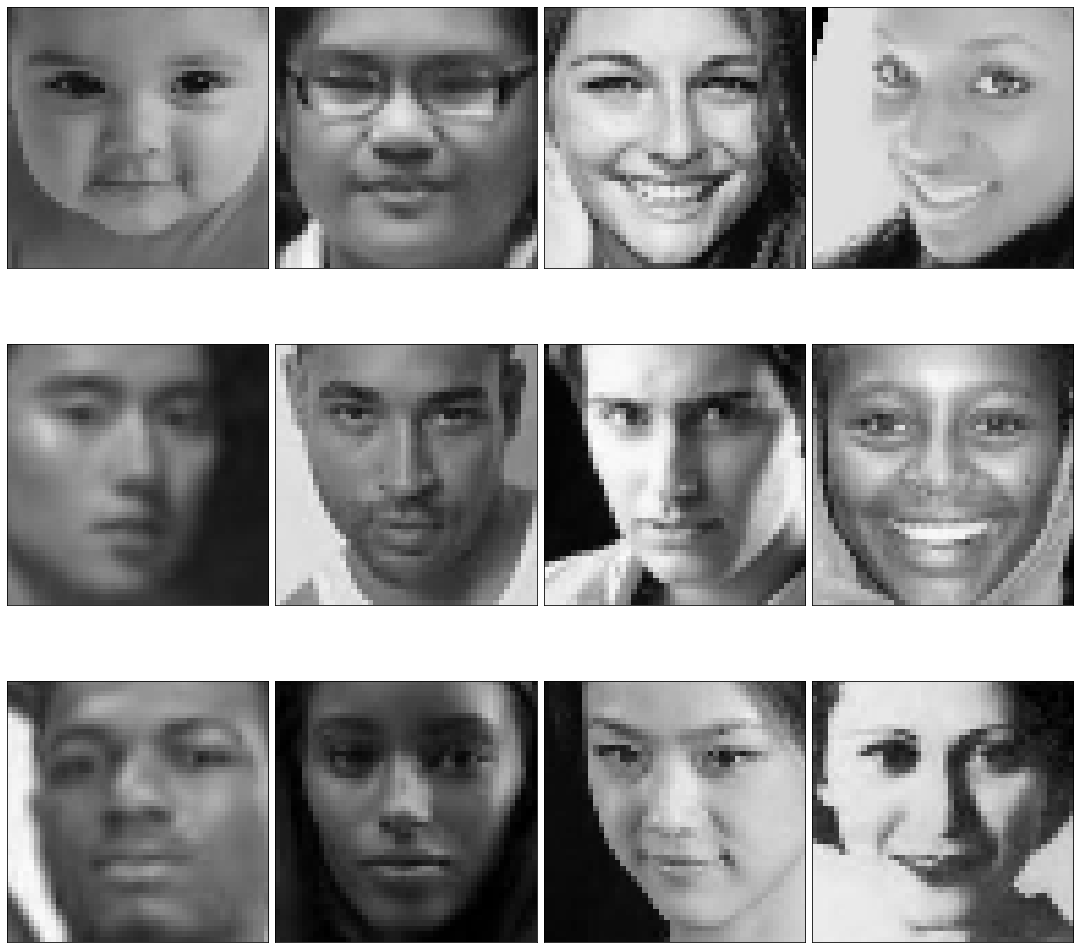

In [41]:
# Creating a subplot of images

plt.figure(figsize=(15,15))

for i in range(13):
  if i==0:
    continue
  plt.subplot(3,4,i)
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(cv2.cvtColor(x[i*800], cv2.COLOR_BGR2RGB))

# Saving the figure.
plt.savefig("output.jpg")
plt.tight_layout(pad=0.7,h_pad=0.2)
plt.show()


## **Conclusion : We have achieved the objective for this notebook. All the processed images and ground truth data is saved in "x.npy" and "y.npy" file which wil be used in next notebook for training our models.**